# Рубежный контроль №1

## Тема: Технологии разведочного анализа и обработки данных.

## Выполнил: Смыслов Дмитрий Олегович, ИУ5-61Б

Вариант: 16

Номер задачи: 2 - Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Набор данных: 8 - https://www.kaggle.com/datasets/altavish/boston-housing-dataset

In [94]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import matplotlib.pyplot as plt

In [95]:
# Загрузка данных
data = pd.read_csv('datasets/HousingData.csv')

In [96]:
# Размеры датасета
data.shape

(506, 14)

In [97]:
# Первые строки датасета
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [98]:
# Информацию о датафрейме и столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Все признаки оказались числовыми, да к тому же только два из них имеют целочисленный тип.
Поэтому придется повнимательнее посмотреть на данные и попытаться найти признак,
который возможно будет сделать категориальным.

In [99]:
# Количество пропусков по столбцам
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [100]:
# Запомним признаки с пропусками и
# выдадим краткую сводку по ним

# Всего строк в датасете
total_count = data.shape[0]  # total_count = 506

bad_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        bad_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print(f"Колонка {col}. Тип данных {dt}. Количество пустых значений {temp_null_count}, {temp_perc}%.")

Колонка CRIM. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка ZN. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка INDUS. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка CHAS. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка AGE. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка LSTAT. Тип данных float64. Количество пустых значений 20, 3.95%.


Получили 6 столбцов с пропусками, причем в каждом из них пропусков довольно мало (~4%).
Поэтому удалять эти столбцы не стоит, так как они несут много информации,
которая может быть полезна в дальнейшем.

Поскольку количество пропусков одинаково для полученных столбцов,
возможно стоит проверить, нет ли таких строк в наборе данных,
в которых большинство признаков не заполнены.
Для этого посчитаем количество строк датасета с пропуском в любом столбце

In [101]:
rows_with_missings = data[data.isna().any(axis=1)]
rows_with_missings.shape[0]

112

Теперь мы видим, что датасет имеет 112 строк с пропусками.
Всего у нас было 6 столбцов по 20 пропусков в каждом,
что дает максимум возможных 120 строк с пропусками, что близко к полученному значению.

Можем сделать вывод, что малоинформативных строк (таких, в которых в большинстве столбцов пропуски)
довольно мало, и в сумме они составляют пятую часть всего датасета, а значит просто удалять их не стоит.

Тогда будем пытаться заполнять пропуски методом импьютации
(классы SimpleImputer и MissingIndicator), выбирая наиболее подходящую стратегию.

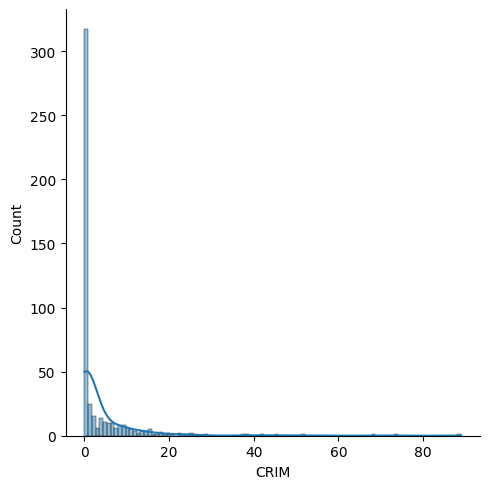

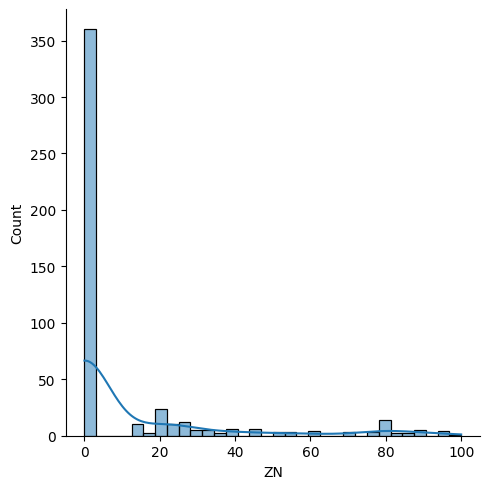

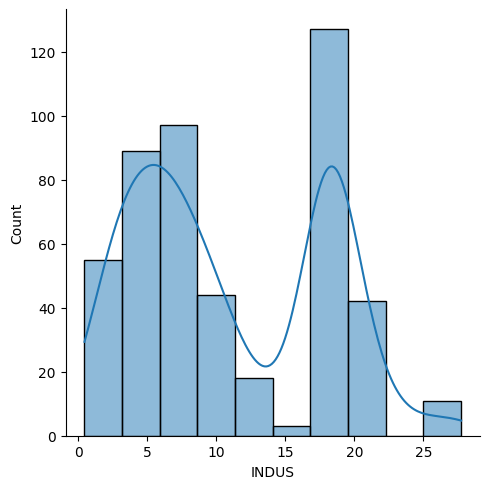

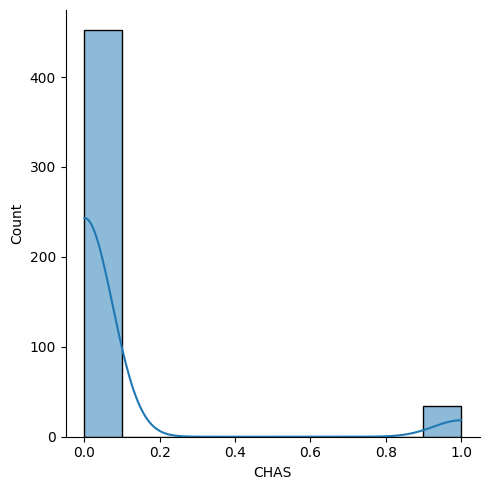

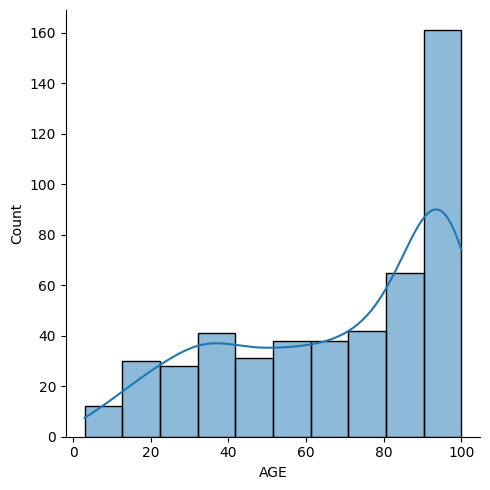

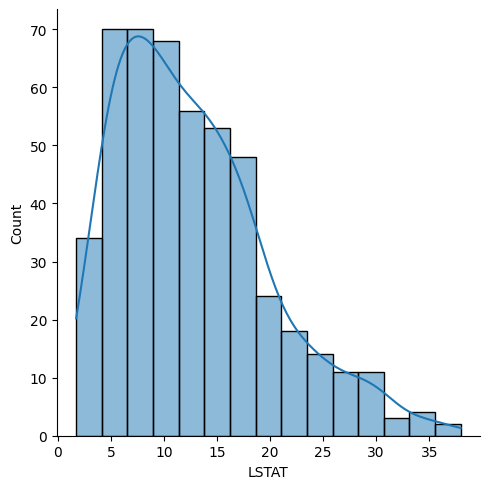

In [102]:
# Распределение значений признаков
for col in bad_cols:
    sns.displot(data=data, x=col, kde=True)

In [103]:
# Уникальные значения столбца "CHAS"
data["CHAS"].unique()

array([ 0., nan,  1.])

Наблюдаем, что признак "CHAS" - бинарный, с пропусками. Так же он соответствует тому факту,
что участок граничит с рекой Чарльз в Бостоне.

Поэтому для выполнения условий данного РК, преобразуем этот признак в категориальный:
0.0 -> "No Charles River", 1.0 -> "Bounds Charles River", nan -> nan

Затем заполним в новом признаке пропуски

In [104]:
# Преобразование в категориальный признак
def map_CHAS(x):
    if x == 1.0:
        return "Bounds Charles River"
    elif x == 0.0:
        return "No Charles River"
    else:
        return np.nan

data["CHAS"] = data["CHAS"].apply(lambda x: map_CHAS(x))
data["CHAS"].unique()

array(['No Charles River', nan, 'Bounds Charles River'], dtype=object)

In [105]:
# Так как пропущенных значений относительно мало (~4%)
# и в подавляющем большинстве случаев признак принимает значение "No Charles River"
# заполним пропуски наиболее частым значением

# Импьютация наиболее частым значением
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data["CHAS"] = imp1.fit_transform(data[["CHAS"]])
data["CHAS"].unique(), data["CHAS"].isnull().sum()

# Таким образом избавились от пропусков в категориальном признаке

(array(['No Charles River', 'Bounds Charles River'], dtype=object), 0)

In [106]:
# Функция, которая позволяет задавать колонку и вид импьютации
def num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return data_num_imp, (column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1])

In [107]:
# У распределения признака "INDUS" можно наблюдать две моды
# Так как мы не обрабатывали и не проверяли наличие выбросов,
# заполнить пропуски медианой

# Импьютация медианой
data["INDUS"], imp_res = num_impute_col(data, "INDUS", "median")
data["INDUS"].isnull().sum(), imp_res

(0, ('INDUS', 'median', 20, 9.69, 9.69))

In [108]:
# Заполнение пропусков в оставшихся признаках
bad_cols.remove("INDUS")
bad_cols.remove("CHAS")
bad_cols

['CRIM', 'ZN', 'AGE', 'LSTAT']

Для колонок "CRIM" и "ZN" выберем стратегию
заполнения пропусков наиболее частым значением (most_frequent),
так как они имеют явно выраженную единственную моду

Для колонки "LSTAT" также выберем стратегию "most_frequent", так как
медиана или среднее может сильно изменить распределение этого признака

Для колонки "AGE" выберем стратегию "median", так как имеется не совсем ярко выраженная мода, и возможны выбросы

In [109]:
strategies_for_remained_cols = [
    "most_frequent",
    "most_frequent",
    "median",
    "most_frequent"
]

for col, strat in zip(bad_cols, strategies_for_remained_cols):
    data[col], imp_res = num_impute_col(data, col, strat)
    print(data[col].isnull().sum(), imp_res)

0 ('CRIM', 'most_frequent', 20, 0.01501, 0.01501)
0 ('ZN', 'most_frequent', 20, 0.0, 0.0)
0 ('AGE', 'median', 20, 76.80000000000001, 76.80000000000001)
0 ('LSTAT', 'most_frequent', 20, 6.36, 6.36)


In [110]:
# Еще раз проверим, что все пропуски заполнены
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

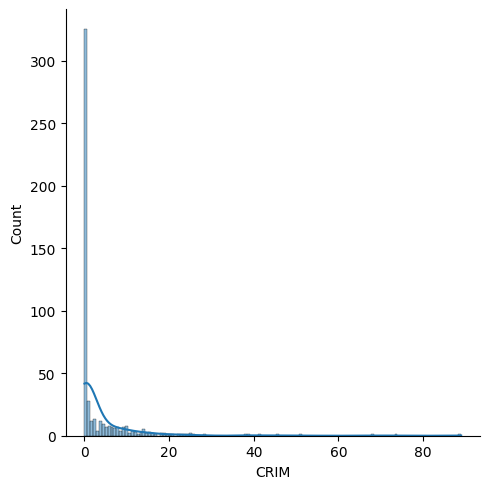

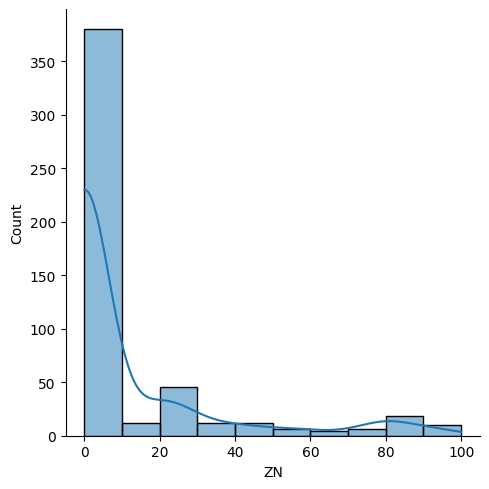

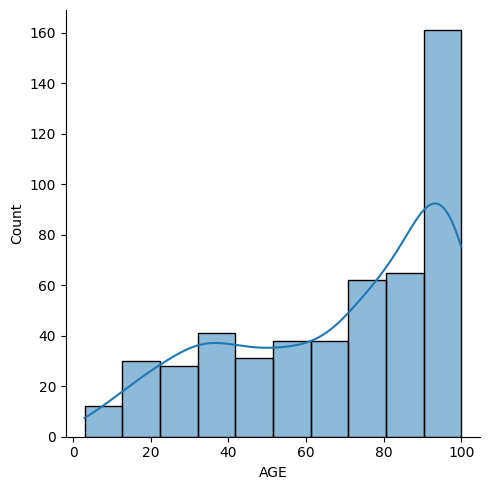

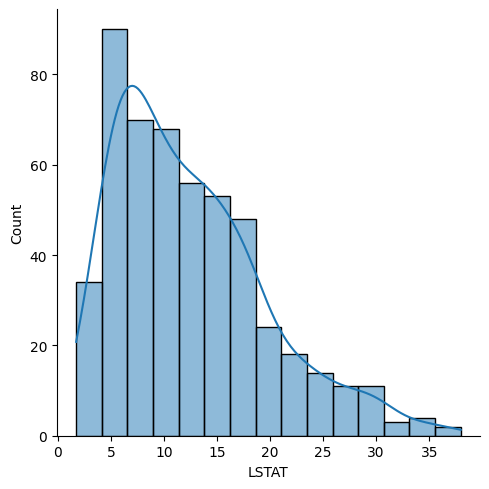

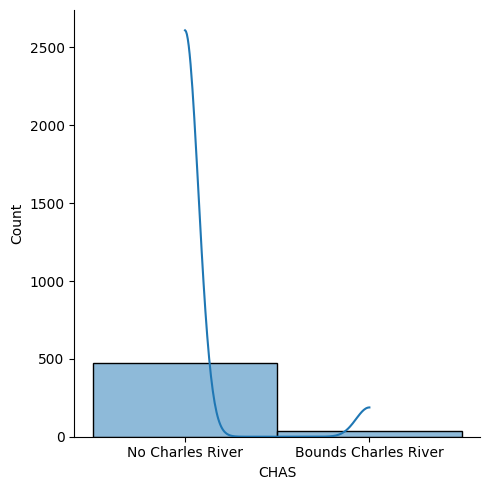

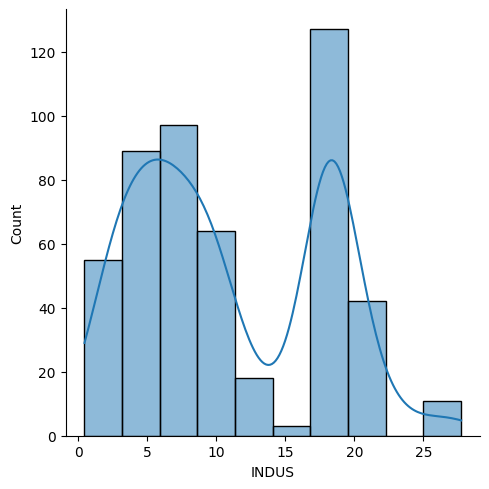

In [111]:
# Проверим распределения после обработки
bad_cols.append("CHAS")
bad_cols.append("INDUS")

for col in bad_cols:
    sns.displot(data=data, x=col, kde=True)

<AxesSubplot: >

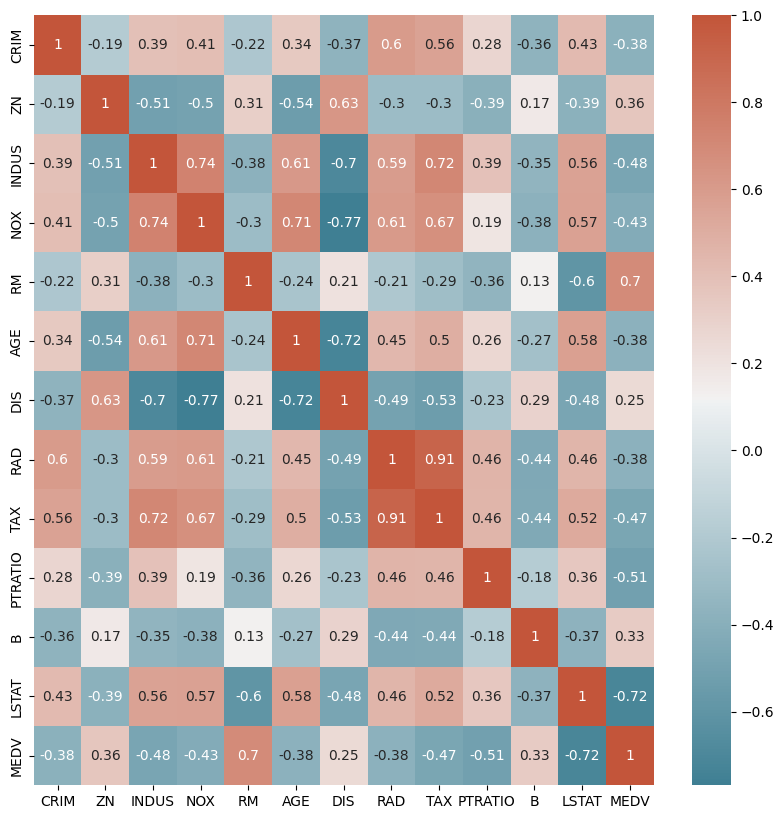

In [112]:
# Матрица корреляции
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.drop("CHAS", axis=1).corr(), annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True), ax=ax)

Доп. требование для группы - диаграмма рассеяния

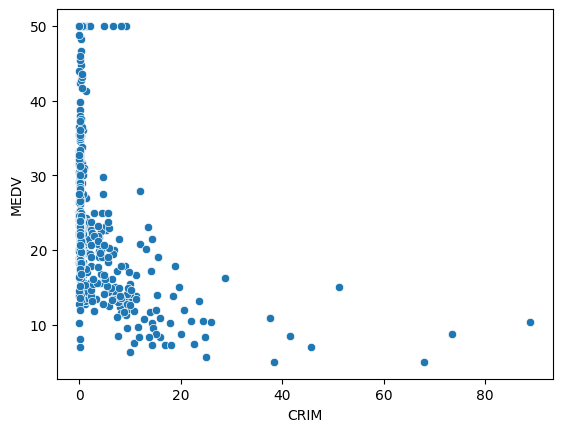

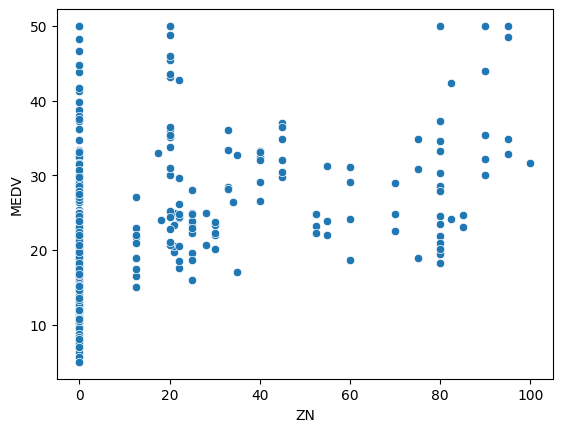

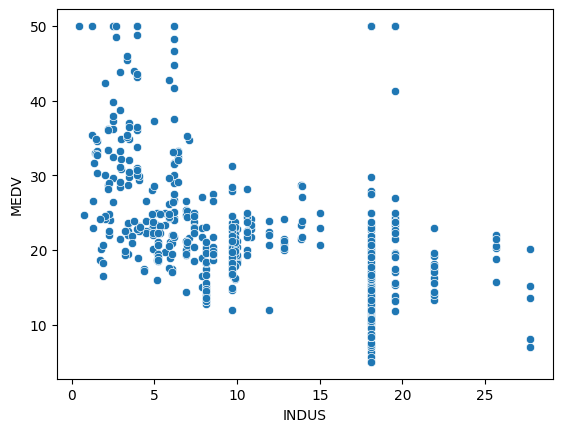

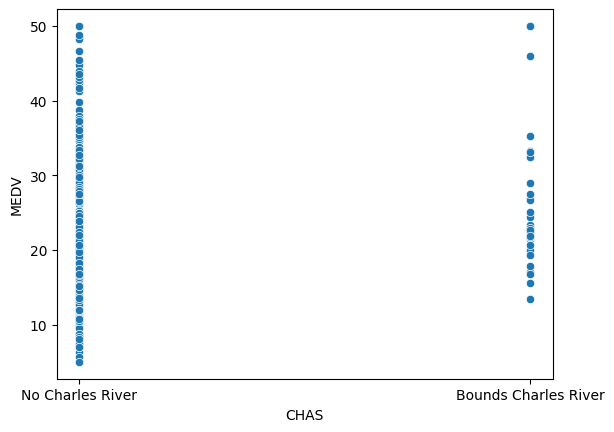

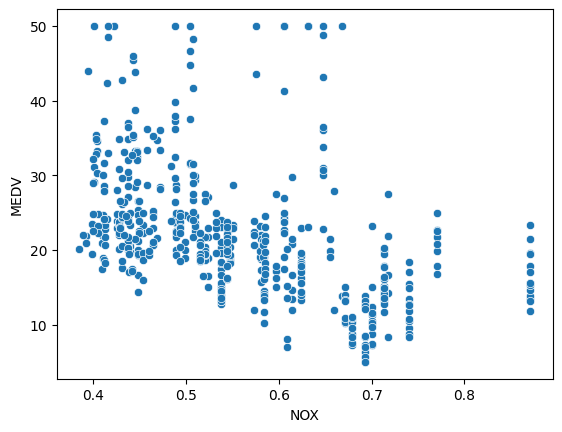

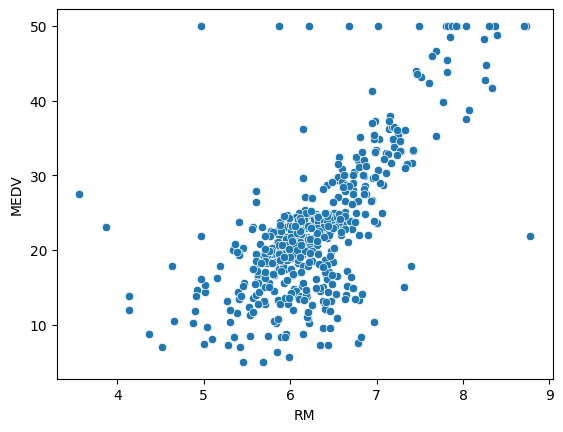

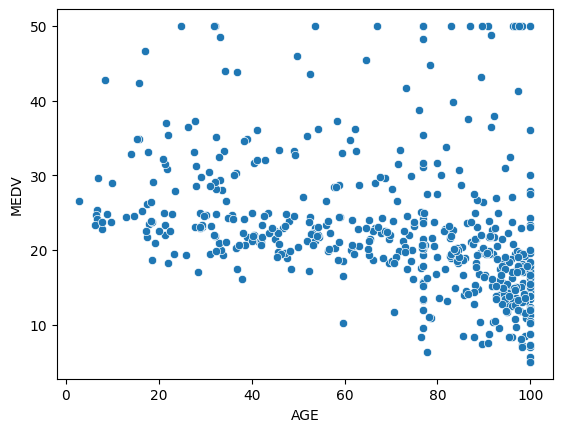

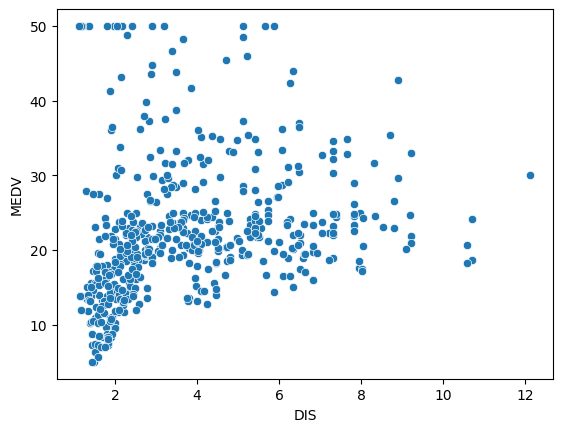

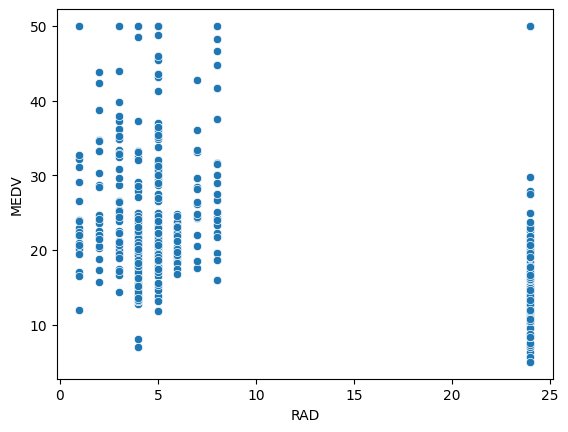

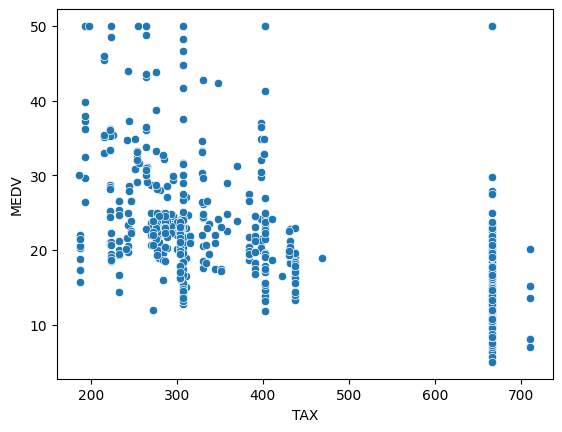

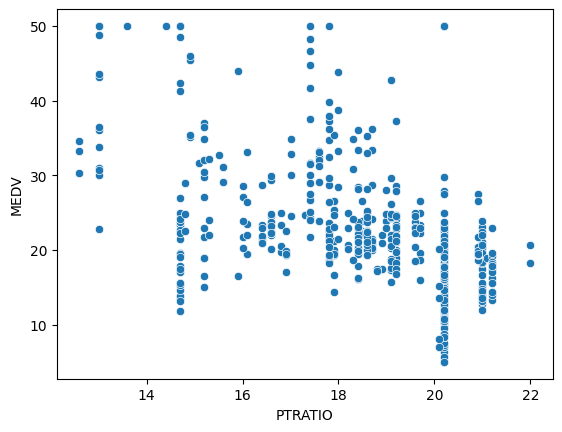

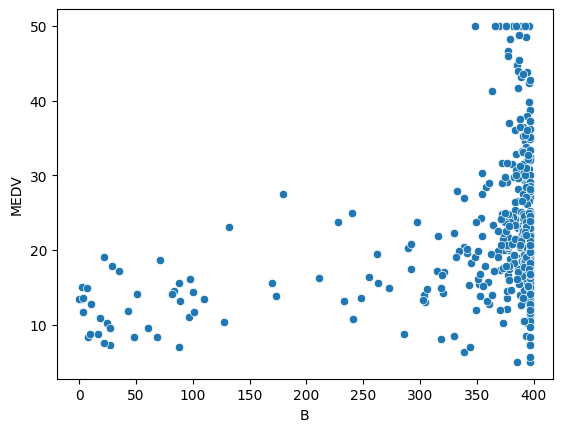

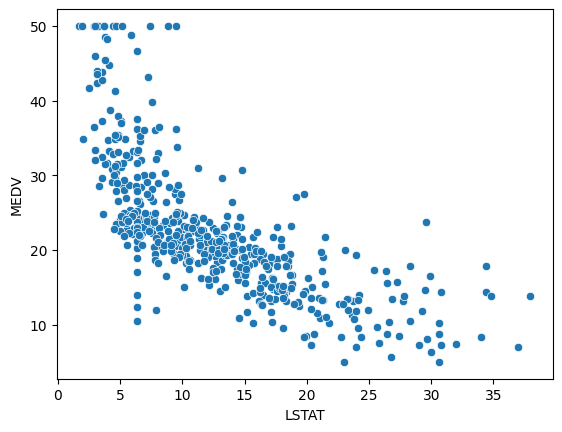

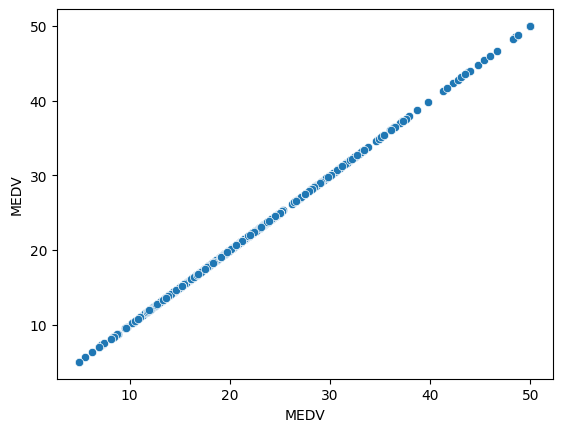

In [113]:
# Здесь приведены диаграммы рассеяния для признака "MEDV" от всех остальных
# "MEDV" здесь может выступать целевым признаком в задаче регрессии - стоимость участка
for col in data.columns:
    sns.scatterplot(data=data, x=col, y="MEDV")
    plt.show()

В глаза сразу бросается тот факт, что значения признака "MEDV" ограничены сверху значением ~50.
В дальнейшем, при обучении моделей, это необходимо будет исправлять

Также подтверждается хорошая зависимость и корреляция данного признака с колонками "RM" и "LSTAT"

Может показаться, что мы заполнили колонки "CRIM" и "ZN" значениями-выбросами,
но навряд ли это так, так как например "CRIM" - урровень преступности на душу населения,
и ожидается, что он будет почти всегда невелик

Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

С точки зрения лишь очистки данных - заполнения пропусков, нельзя с уверенностью сказать,
какие признаки точно нужно отбрасывать при построении моделей, так как пропусков в целом не так много,
чтобы они могли сильно испортить наши модели.

В качестве примера можно решать задачу регрессии
и строить модель зависимости признака "MEDV" - стоимости участка
от остальных признаков.
В таком случае, точно стоит использовать в модели признаки "RM" и "LSTAT",
так как они хорошо коррелируют с целевым признаком.
И наоборот, одновременно брать оба признака "RAD" и "TAX" не стоит,
так они сами между собой очень сильно коррелируют и чуть ли не линейно зависимы,
а это может негативно повлиять на обучение и результат данной модели (возможно стоит пробовать L1 регуляризацию).

Для улучшения качества модели, возможно стоит убрать из рассмотрения слабо коррелирующие
с целевым признаки, такие как например: "ZN", "DIS", "B" "RAD"
